<h1 style='color:Crimson' align='center'>Random Forest Example</h1>

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

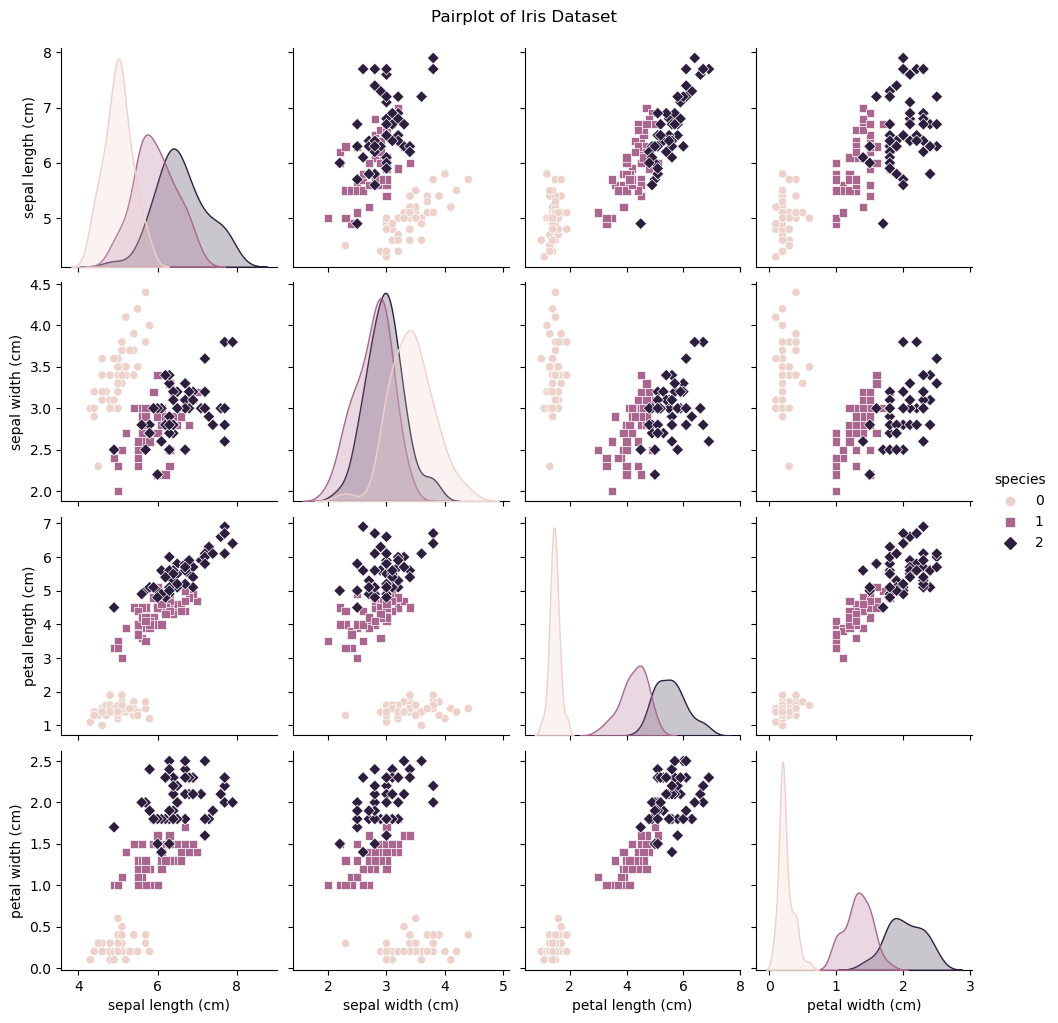

In [3]:
# Visualizing the dataset with pairplot
iris_df = pd.DataFrame(X, columns=iris.feature_names) #createnew data frame 
iris_df['species'] = y  #add new column to data frame

#hue='species': This parameter assigns different colors to the data points based on the values in the 'species' column.
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"]) #o-Circle, s-Square, D-Diamond
plt.suptitle('Pairplot of Iris Dataset', y=1.02) #y=1.02 parameter adjusts the vertical position of the title slightly above the plot to avoid overlapping.
plt.show()

In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initializing the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
#specifies the number of decision trees to be built in the random forest

In [6]:
# Training the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Making predictions on the test data
y_pred = clf.predict(X_test)

In [8]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


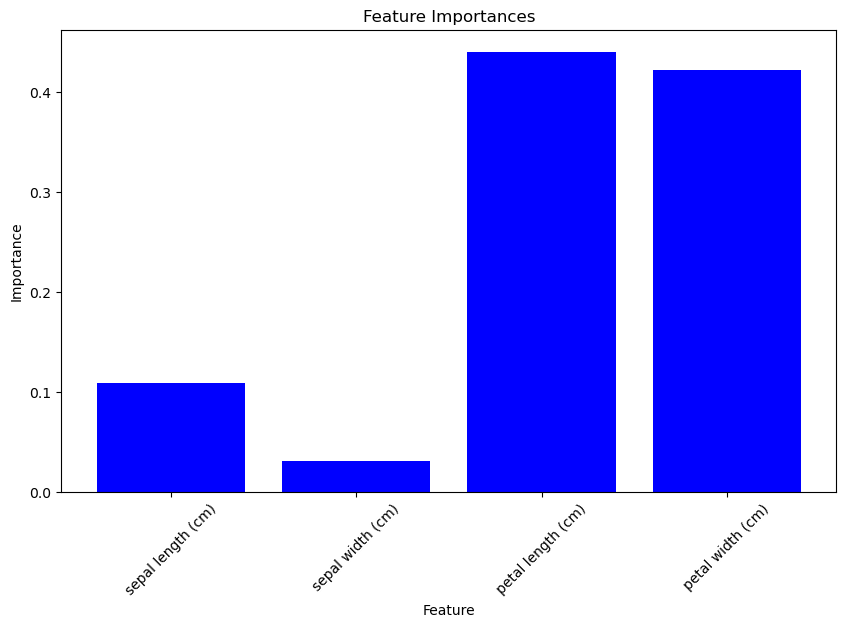

In [9]:
# Plotting feature importances
importances = clf.feature_importances_ #Feature importance indicates how much each feature contributes to predicting the target variable of trained model.
indices = range(len(importances)) #generates a sequence of integers from 0 to the length of the importances array.
#range(len(importances)) is used to set the positions of the bars on the x-axis.
features = iris.feature_names

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(indices, importances, color='b', align='center')
plt.xticks(indices, features, rotation=45) #sets the tick labels on the x-axis to be the feature names (features) corresponding to each index (indices).
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [10]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

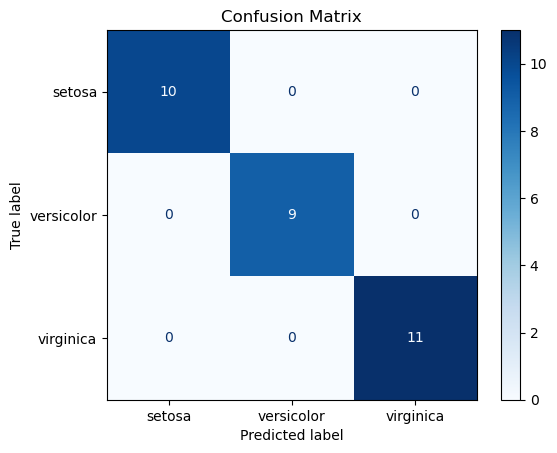

In [11]:
# Plotting the confusion matrix
matrix = confusion_matrix(y_test, y_pred)  #This function computes the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,  display_labels=iris.target_names)  #display object for the confusion matrix.
disp.plot(cmap=plt.cm.Blues)  #cmap: Short for "color map", colormap named "Blues" from the matplotlib.cm module.
plt.title('Confusion Matrix')
plt.show()